# Sentiment Analysis

In [49]:
# First of all we have to import all the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,ConfusionMatrixDisplay

In [50]:
# Now we are going to loading data from url and making a dataframe
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
df = pd.read_csv(url , sep='\t' , header=None , names=['labels' , 'text'])

### Getting information about data

In [51]:
# First of all we see head of data
df.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
# Now we will check the data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [53]:
# Checking the shape of the data
df.shape

(5572, 2)

In [54]:
# Now we will check is there is any null values in the dataset
df.isnull().sum()

labels    0
text      0
dtype: int64

- There is no empty data in the data

In [55]:
# Droping all the empty rows from the data
df.dropna(inplace=True)

In [56]:
df.shape

(5572, 2)

### Feature Enginerring

In [57]:
# Now we will change the columns name ham and spam to 0 and 1
df['labels'] = df['labels'].map({'ham':1 , 'spam':0})
df.head()

,labels,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['text']).toarray()
y = df['labels']

### Head towards model training

In [59]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

### LOGISTIC REGRESSION

In [60]:
# Now we will move towards model training
# logistic Regression

lr = LogisticRegression()
lr.fit(X_train , y_train)
pred_lr = lr.predict(X_test)
print(f'Accuracy of logistic Regression is: {accuracy_score(y_test , pred_lr)}')

Accuracy of logistic Regression is: 0.9641255605381166


In [61]:
# All Evalutaion for Logistic Regression

print("Accuracy:", accuracy_score(y_test, pred_lr))
print("Precision:", precision_score(y_test, pred_lr))
print("Recall:", recall_score(y_test, pred_lr))
print("F1 Score:", f1_score(y_test, pred_lr))

Accuracy: 0.9641255605381166
Precision: 0.9602385685884692
Recall: 1.0
F1 Score: 0.9797160243407708


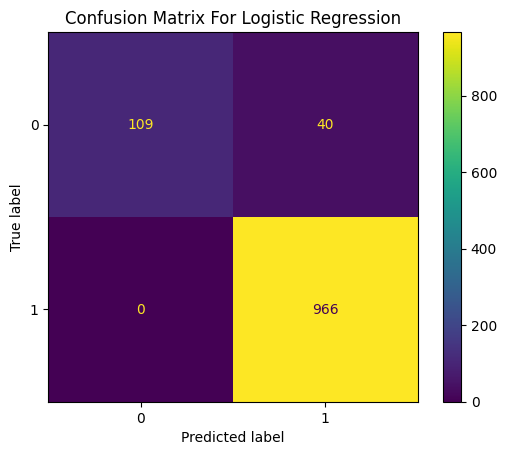

In [62]:
cm = confusion_matrix(y_test, pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix For Logistic Regression")
plt.show()

### RANDOM FOREST CLASSIFIER

In [63]:
# Now we will trian Random Forest
 
rfc = RandomForestClassifier()
rfc.fit(X_train , y_train)
pred_rfc = rfc.predict(X_test)
print(f'Accuracy of Random Forest Classifier is: {accuracy_score(y_test , pred_rfc)}')

Accuracy of Random Forest Classifier is: 0.9811659192825112


In [64]:
# All Evalutaion for Random Forest

print("Accuracy:", accuracy_score(y_test, pred_rfc))
print("Precision:", precision_score(y_test, pred_rfc))
print("Recall:", recall_score(y_test, pred_rfc))
print("F1 Score:", f1_score(y_test, pred_rfc))

Accuracy: 0.9811659192825112
Precision: 0.9787234042553191
Recall: 1.0
F1 Score: 0.989247311827957


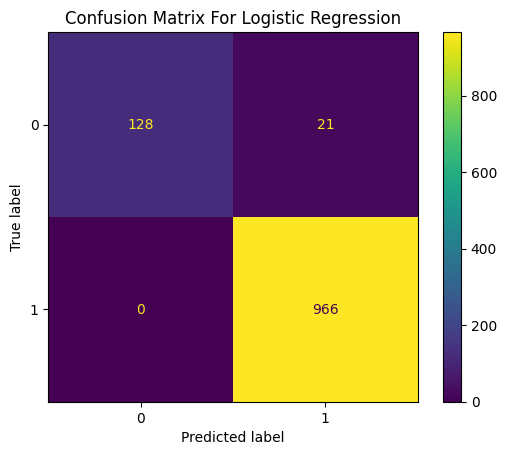

In [ ]:
cm = confusion_matrix(y_test, pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix For Random Forest")
plt.show()

### GUASSIAN NAIVE BAYES

In [66]:
# Now we will trian naive bayes 

gnb = GaussianNB()
gnb.fit(X_train , y_train)
pred_gnb = gnb.predict(X_test)
print(f'Accuracy of Gaussian NB is: {accuracy_score(y_test , pred_gnb)}')

Accuracy of Gaussian NB is: 0.8941704035874439


In [67]:
# All Evalutaion for Guassian Navie bayes

print("Accuracy:", accuracy_score(y_test, pred_gnb))
print("Precision:", precision_score(y_test, pred_gnb))
print("Recall:", recall_score(y_test, pred_gnb))
print("F1 Score:", f1_score(y_test, pred_gnb))

Accuracy: 0.8941704035874439
Precision: 0.9862385321100917
Recall: 0.8902691511387164
F1 Score: 0.9357997823721437


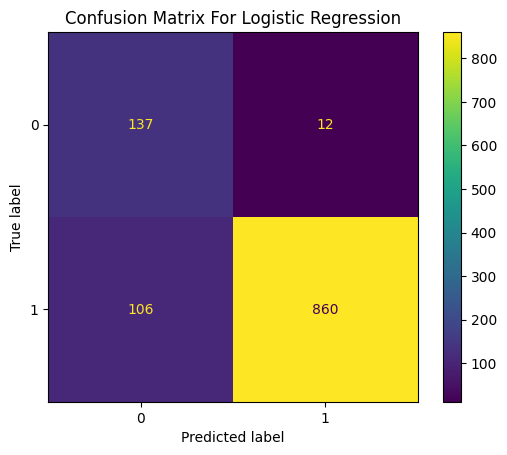

In [ ]:
cm = confusion_matrix(y_test, pred_gnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix For Guassian NB")
plt.show()